# Homework 2

## Hoeffding Inequality
Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently
10 times. Focus on 3 coins as follows: $c_1$ is the first coin flipped, $c_\mathrm{rand}$ is a
coin chosen randomly from the 1,000, and $c_\mathrm{min}$ is the coin which had the minimum
frequency of heads (pick the earlier one in case of a tie). Let $\nu_1$, $\nu_\mathrm{rand}$, and $\nu_\mathrm{min}$ be
the fraction of heads obtained for the 3 respective coins out of the 10 tosses.
Run the experiment 100,000 times in order to get a full distribution of $\nu_1$, $\nu_\mathrm{rand}$, and
$\nu_{\mathrm{min}}$ (note that $c_\mathrm{rand}$ and $c_\mathrm{min}$ will change from run to run)

### Question 1
The average value of $\nu_\mathrm{min}$ is closest to

In [1]:
# rand() is terribly slow
function coin_experiment1(num_experiments)
    sum_c1 = 0.0
    sum_crand = 0.0
    sum_cmin = 0.0
    c1 = 1

    for i in 1:num_experiments
        coin10x1000_fliped = sum(rand(Bool, (1000,10)), 2)
        crand = rand(1:1000)
        minval = minimum(coin10x1000_fliped)
        sum_c1 += coin10x1000_fliped[c1]
        sum_crand += coin10x1000_fliped[crand]
        sum_cmin += minval
    end
    return [sum_c1 sum_crand sum_cmin]/(num_experiments*10)
end

coin_experiment1 (generic function with 1 method)

In [3]:
@time coin_experiment1(100000)

  6.652962 seconds (1.30 M allocations: 1.727 GB, 2.34% gc time)


1x3 Array{Float64,2}:
 0.500047  0.500075  0.037844

In [4]:
# vectorized, not fast:-)
function coin_experiment1_vec(num_experiments)
    coin10x1000_fliped_results = sum(rand(Bool, (1000, 10, num_experiments)), 2)
    crand_idxs = rand(1:1000, num_experiments)
    vc1 = coin10x1000_fliped_results[1,1,:][:]
    vrands = diag(slice(coin10x1000_fliped_results, crand_idxs, 1, 1:num_experiments))
    vmins = minimum(coin10x1000_fliped_results, 1)[:]
    return [sum(vc1), sum(vrands), sum(vmins)]/(10*num_experiments)
end

coin_experiment1_vec (generic function with 1 method)

In [6]:
@time vmins = coin_experiment1_vec(100000)

  7.428713 seconds (81 allocations: 1.682 GB, 0.09% gc time)


3-element Array{Float64,1}:
 0.500305
 0.500132
 0.037433

In [8]:
function rand_is_slow(num_experiments)
    rand(Bool, (1000, 10, num_experiments))
    return
end

rand_is_slow (generic function with 1 method)

In [9]:
@time rand_is_slow(100000)

  4.980718 seconds (268 allocations: 953.690 MB, 1.59% gc time)


### Question 2
Which coin(s) has a distribution of $\nu$ that satisfies the (single-bin) Hoeffding
Inequality?

In [7]:
function coin_experiment2(num_experiments)
    mu_c1 = []
    mu_crand = []
    mu_cmin = []
    c1 = 1
    for i in 1:num_experiments
        coin10x1000_fliped = sum(rand(Bool, (1000,10)), 2)
        crand = rand(1:1000)
        minval, cmin = findmin(coin10x1000_fliped)
        push!(mu_c1, coin10x1000_fliped[c1])
        push!(mu_crand, coin10x1000_fliped[crand])
        push!(mu_cmin, coin10x1000_fliped[cmin])
    end
    return mu_c1/10, mu_crand/10, mu_cmin/10
end

coin_experiment2 (generic function with 1 method)

In [8]:
@time mu_c1, mu_crand, mu_cmin = coin_experiment2(100000)

  6.925206 seconds (1.62 M allocations: 1.740 GB, 3.97% gc time)


(Any[0.5,0.7,0.2,0.6,0.5,0.7,0.9,0.2,0.4,0.6  …  0.5,0.2,0.8,0.7,0.5,0.6,0.6,0.2,0.4,0.4],Any[0.5,0.3,0.5,0.7,0.3,0.3,0.7,0.5,0.3,0.5  …  0.4,0.5,0.2,0.7,0.4,0.4,0.5,0.5,0.4,0.3],Any[0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0])

In [9]:
using PyPlot

function coin_histgram(args...)
    col_num = length(args)
    fig, axes = subplots(1, col_num, figsize=(15, 4))
    sub_num = 0
    for i in 1:col_num
        ax = axes[i]
        sub_num += 1
        ax[:hist](args[i], bins=100)
        ax[:set_title]("histgram $sub_num")
    end
end

coin_histgram (generic function with 1 method)

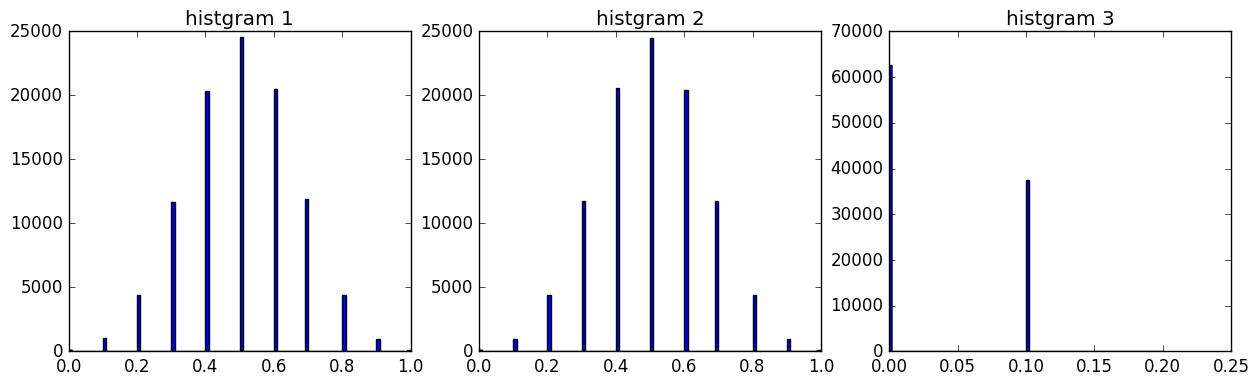

In [10]:
coin_histgram(mu_c1, mu_crand, mu_cmin)

In [11]:
function hoeffding_plot(data1, data2, data3)
    figure(figsize=(5,5))
    x = linspace(0,1,51)
    y1 = [sum(map(abs, data1 - 0.5) .> eps)/length(data1) for eps in x]
    y2 = [sum(map(abs, data2 - 0.5) .> eps)/length(data2) for eps in x]
    y3 = [sum(map(abs, data3 - 0.5) .> eps)/length(data3) for eps in x]
    plot(x, 2e.^(-20x.^2), "-", label="Hoeffding") 
    plot(x, y1, "--", label=L"$c_1$")
    plot(x, y2, ":", label=L"$c_\mathrm{rand}$")
    plot(x, y3, "-", label=L"$c_\mathrm{min}$")
    title("Heffding Inequality")
    legend(loc="best")
end

hoeffding_plot (generic function with 1 method)

In [12]:
function hoeffding_plot2(args...)
    data_num = length(args)
    figure(figsize=(5,5))
    x = linspace(0,1,51)
    title("Heffding Inequality")
    plot(x, 2e.^(-20x.^2), "-", label="Hoeffding") 

    for i in 1:data_num
        y = [sum(map(abs, args[i] - 0.5) .> eps)/length(args[i]) for eps in x]
        plot(x, y, ":", label="data $i")
    end
    legend(loc="best")
end

hoeffding_plot2 (generic function with 1 method)

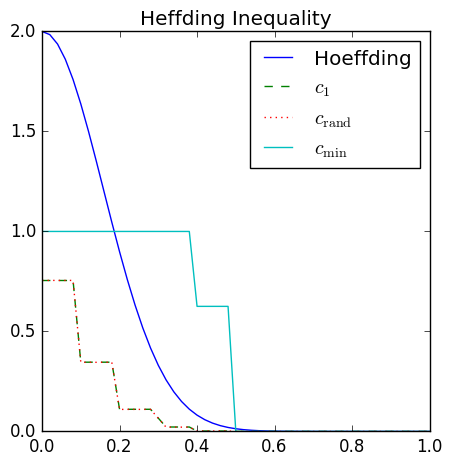

PyObject <matplotlib.legend.Legend object at 0x7fdac6530fd0>

In [13]:
hoeffding_plot(mu_c1, mu_crand, mu_cmin)

## Error and Noise
Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in
approximating a deterministic target function $f$ (both $h$ and $f$ are binary functions).
If we use the same $h$ to approximate a noisy version of $f$ given by:
$$P(y \mid \mathbf{x}) =
\begin{cases}
\lambda & y = f(x) \\
1-\lambda & y \neq f(x)
\end{cases}$$

### Question 3
What is the probability of error that $h$ makes in approximating $y$? Hint: Two
wrongs can make a right!

The error happens in two cases.
* $y \neq f(x)$ and $f(x) = h(x)$. This probability is $(1-\lambda)\times(1-\mu)$
* $y = f(x)$ and $f(x) \neq h(x)$. This probability is $\lambda\times\mu$
* So, the answer is $(1-\lambda)\times(1-\mu) + \lambda\times\mu$

### Question 4
At what value of $\lambda$ will the performance of $h$ be independent of $\mu$?

$(1-\lambda)\times(1-\mu) + \lambda\times\mu = (2\lambda - 1)\mu + (1 - \lambda)$. So, $\lambda = \frac{1}{2}$ makes this probability independent of $\mu$.

## Linear Regression
In these problems, we will explore how Linear Regression for classification works. As
with the Perceptron Learning Algorithm in Homework # 1, you will create your own
target function $f$ and data set $\mathcal{D}$. Take $d = 2$ so you can visualize the problem, and
assume $\mathcal{X} = [\mbox{-1,1}] \times [\mbox{-1,1}]$ with uniform probability of picking each $x \in \mathcal{X}$.
In each run, choose a random line in the plane as your target function $f$ (do this by
taking two random, uniformly distributed points in $[\mbox{-1,1}]\times[\mbox{-1,1}]$ and taking the
line passing through them), where one side of the line maps to +1 and the other maps
to -1. Choose the inputs $\mathbf{x}_n$ of the data set as random points (uniformly in $\mathcal{X}$), and
evaluate the target function on each $\mathbf{x}_n$ to get the corresponding output $y_n$.

### Question 5
Take $N = 100$. Use Linear Regression to find $g$ and evaluate $E_\mathrm{in}$, the fraction of
in-sample points which got classified incorrectly. Repeat the experiment $1000$
times and take the average (keep the $g$'s as they will be used again in Problem
6). Which of the following values is closest to the average $E_\mathrm{in}$? (Closest is the
option that makes the expression |your answer−given option| closest to $0$. Use
this definition of closest here and throughout.)

In [14]:
function gen_dataset(num_points)
    linpts = 2.0*rand((2,2)) - 1.0
    targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    #targ_weights = Float64[
    #    (linpts[2,1] - linpts[1,1])*linpts[1,1] + (linpts[2,2] - linpts[1,2])*linpts[1,2],
    #    linpts[2,1] - linpts[1,1],
    #    linpts[2,2] - linpts[1,2]]
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    labels = sign(points*targ_weights)
    return points, labels, targ_weights
end

function mis_classified_count(points, labels, weights)
    return sum(sign(points*weights) .!= labels)
end

function linear_regression(points, labels)
    return pinv(points'*points)*points'*labels # this is faster than simple pinv(points)*labels
end

linear_regression (generic function with 1 method)

In [15]:
using PyPlot

function plot_regression(points, labels, targ_weights, hypo_weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("regression",figsize=(5,5))
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, color="red")
    scatter(x21, x22, color="blue")
    s = linspace(-1,1)
    targ_func(x) = -targ_weights[2]/targ_weights[3]*x - targ_weights[1]/targ_weights[3]
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, targ_func(s), "g-")
    plot(s, hypo_func(s), "y-")
    title("Regression")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_regression (generic function with 1 method)

In [16]:
function simulate_linear_regression(num_points; num_iterations=1000, plot=false)
    ein = []
    targ_weights_list = []
    weights_list = []
    for idx in 1:num_iterations
        points, labels, targ_weights = gen_dataset(num_points)
        weights = linear_regression(points, labels)
        push!(ein, mis_classified_count(points, labels, weights)/num_points)
        push!(targ_weights_list, targ_weights)
        push!(weights_list, weights)
        if plot == true && idx == num_iterations
            plot_regression(points, labels, targ_weights, weights)
        end
    end
    figure(figsize=(5,5))
    plt[:hist](ein, round(Int64, num_iterations/20))
    title("histgram of Ein")
    return mean(ein), targ_weights_list, weights_list
end

simulate_linear_regression (generic function with 1 method)

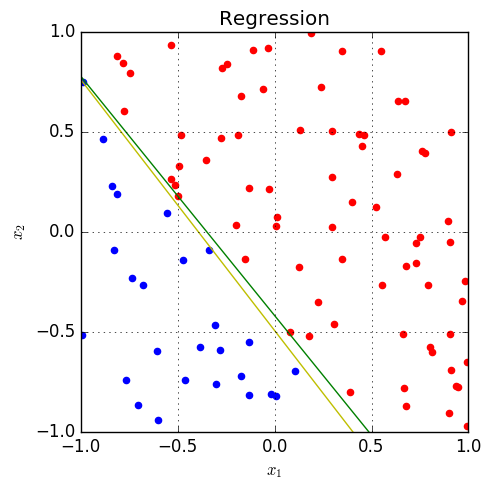

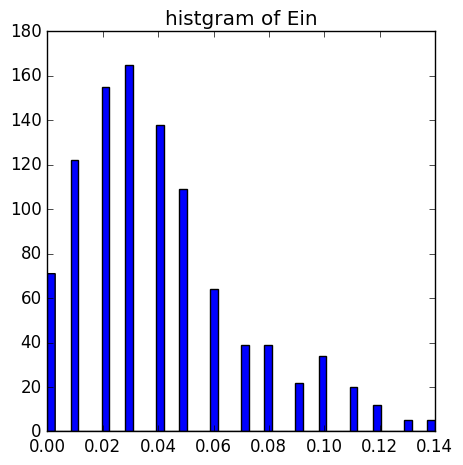

0.04030000000000006

In [17]:
prob_sum, targ_weights_list, weights_list = simulate_linear_regression(100, num_iterations=1000, plot=true)
prob_sum

### Question 6
Now, generate $1000$ fresh points and use them to estimate the out-of-sample
error $E_\mathrm{out}$ of $g$ that you got in Problem 5 (number of misclassified out-of-sample
points / total number of out-of-sample points). Again, run the experiment $1000$
times and take the average. Which value is closest to the average $E_\mathrm{out}$?

In [18]:
function eout_linear_regression(targ_weights_list, weights_list; num_mc_points=1000)
    eout = []
    len_weights = length(targ_weights_list)
    points = [ones(num_mc_points) (2.0*rand((num_mc_points,2)) - 1.0)]
    for i in 1:len_weights
        labels = sign(points*targ_weights_list[i])
        push!(eout, mis_classified_count(points, labels, weights_list[i])/num_mc_points)
    end
    figure(figsize=(5,5))
    plt[:hist](eout,50)
    return mean(eout)
end

eout_linear_regression (generic function with 1 method)

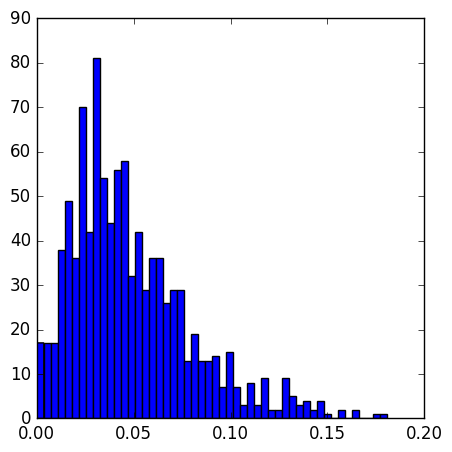

0.04871999999999994

In [19]:
eout_linear_regression(targ_weights_list, weights_list, num_mc_points=1000)

### Question 5 and 6 with 1000 points
The answer to Q6 becomes stable with 1000 points.

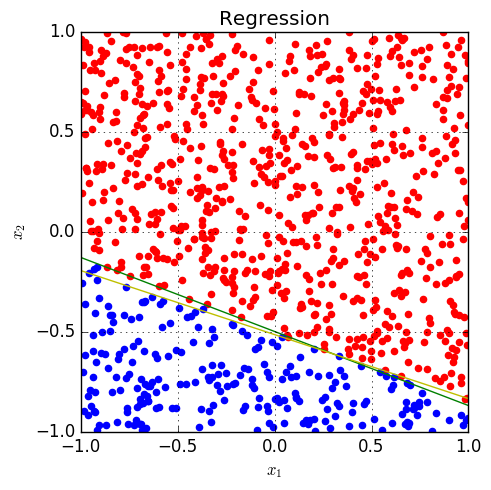

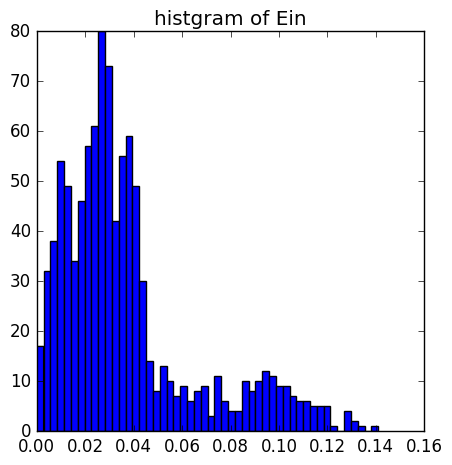

0.03725300000000002

In [20]:
prob_sum, targ_weights_list, weights_list = simulate_linear_regression(1000, num_iterations=1000, plot=true)
prob_sum

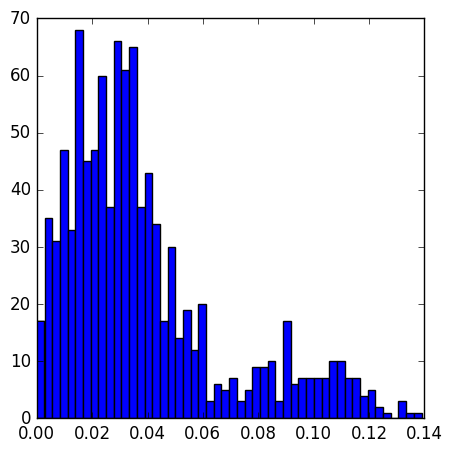

0.038442000000000004

In [21]:
eout_linear_regression(targ_weights_list, weights_list, num_mc_points=1000)

### Question 7
Now, take $N = 10$. After finding the weights using Linear Regression, use
them as a vector of initial weights for the Perceptron Learning Algorithm. Run
PLA until it converges to a final vector of weights that completely separates
all the in-sample points. Among the choices below, what is the closest value to
the average number of iterations (over $1000$ runs) that PLA takes to converge?
(When implementing PLA, have the algorithm choose a point randomly from
the set of misclassified points at each iteration)

In [22]:
function mis_collection(points, labels, weights)
    return find(sign(points*weights) .!= labels)
end

function perceptron_plus(points, labels)
    weights = linear_regression(points, labels)
    num_iter = 0
    mis_idxs = mis_collection(points, labels, weights)
    if length(mis_idxs) == 0
        return weights, num_iter
    end
    while true
        idx = mis_idxs[rand(1:length(mis_idxs))]
        weights += labels[idx] * points[idx,:][:]
        num_iter += 1
        mis_idxs = mis_collection(points, labels, weights)
        if length(mis_idxs) == 0
            break
        end
    end
    
    return weights, num_iter
end

perceptron_plus (generic function with 1 method)

In [23]:
function simulate_pla_plus(num_points; num_iterations=1000)
    iter = []
    for idx in 1:num_iterations
        points, labels, targ_weights = gen_dataset(num_points)
        _, num_iter = perceptron_plus(points, labels)
        push!(iter, num_iter)
    end
    figure(figsize=(5,5))
    dat = sort(iter)
    plt[:hist](dat[dat .< 5*num_points],50)
    title("histgram (truncated) with $num_points points")
    return mean(iter)
end

simulate_pla_plus (generic function with 1 method)

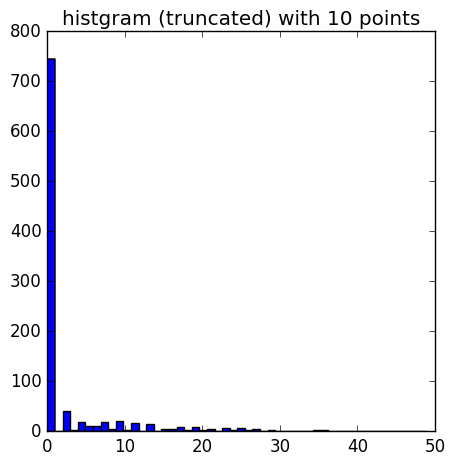

4.043

In [30]:
simulate_pla_plus(10)

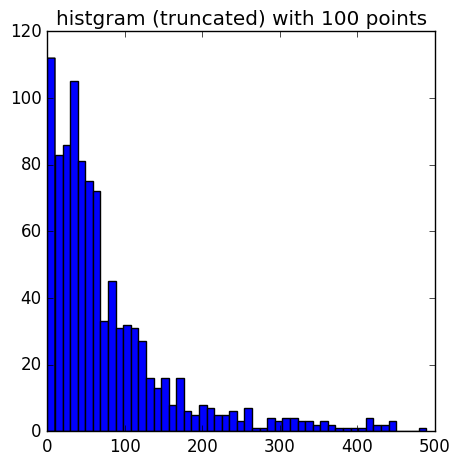

96.032

In [32]:
simulate_pla_plus(100)

If the points are not completely separated by regression, this regression has almost no impact on the number of iteration.

## Nonlinear Transformation
In these problems, we again apply Linear Regression for classification. Consider the
target function:
$$f(x_1, x_2) = \mathrm{sign}(x_1^2 +x_2^2 -0.6)$$
Generate a training set of $N = 1000$ points on $\mathcal{X} = [\mbox{-1,1}]\times[\mbox{-1,1}]$ with a uniform
probability of picking each $x\in \mathcal{X}$. Generate simulated noise by flipping the sign of
the output in a randomly selected $10\%$ subset of the generated training set.

### Question 8
Carry out Linear Regression without transformation, i.e., with feature vector:
$$(1, x_1, x_2)$$
to find the weight $\mathbf{w}$. What is the closest value to the classification in-sample
error $E_\mathrm{in}$? (Run the experiment $1000$ times and take the average $E_\mathrm{in}$ to reduce
variation in your results.)

In [33]:
using StatsBase

function gen_noisy_dataset(num_points::Int64; noise_rate=0.1::Float64)
    linpts = 2.0*rand((2,2)) - 1.0
    targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    target = x -> sign(x[2]^2 + x[3]^2 - 0.6)
    labels = mapslices(target, points, 2)
    if noise_rate > 0.0
        noise_idxs = sample(1:num_points, round(Int64, num_points*noise_rate), replace=false)
        for i in noise_idxs
            labels[i] *= -1
        end
    end
    return points, labels
end

gen_noisy_dataset (generic function with 1 method)

In [34]:
using PyPlot

function plot_linear_regression(points, labels, hypo_weights)
    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("regression",figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    t = s'
    contour(t, s, t.^2 .+ s.^2-0.6, 0, colors=("green"))
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, hypo_func(s), "y-")
    title("Regression")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_linear_regression (generic function with 1 method)

In [35]:
function simulate_linear_regression_noisy(num_points; num_iterations=1000, noise_rate=0.1, plot=false)
    prob_sum = 0.0
    targ_weights = zeros(3)
    weights = zeros(3)
    for idx in 1:num_iterations
        points, labels = gen_noisy_dataset(num_points, noise_rate=noise_rate)
        weights = linear_regression(points, labels)
        prob_sum += mis_classified_count(points, labels, weights)/num_points
        if plot == true && idx == num_iterations
            plot_linear_regression(points, labels, weights)
        end
    end
    return prob_sum / num_iterations
end

simulate_linear_regression_noisy (generic function with 1 method)

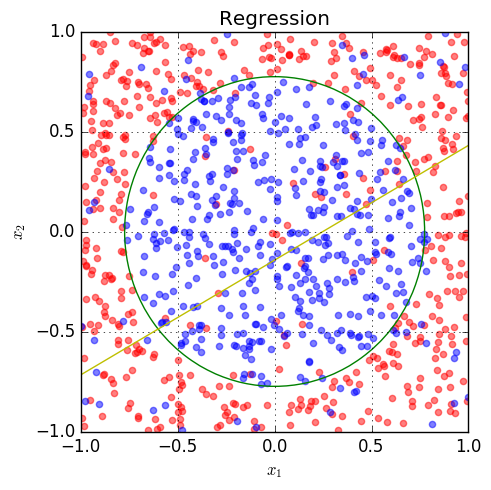

0.5051840000000003

In [38]:
simulate_linear_regression_noisy(1000, num_iterations=1000, plot=true)

### Problem 9
Now, transform the $N = 1000$ training data into the following nonlinear feature
vector:
$$(1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$$
Find the vector $\tilde{\mathbf{w}}$ that corresponds to the solution of Linear Regression. Which
of the following hypotheses is closest to the one you find? Closest here means
agrees the most with your hypothesis (has the highest probability of agreeing on
a randomly selected point). Average over a few runs to make sure your answer
is stable.

In [39]:
function find_near_weights(num_points; num_iteration=100, noise_rate=0.1)
    weights_cand = [-1.0 -0.05 0.08 0.13 1.5 1.5;
                    -1.0 -0.05 0.08 0.13 1.5 15.0;
                    -1.0 -0.05 0.08 0.13 15.0 1.5;
                    -1.0 -1.5 0.08 0.13 0.05 0.05;
                    -1.0 -0.05 0.08 1.5 0.15 0.15]
    prob_sum = zeros(5)
    weights_list = []

    for _ in 1:num_iteration
        points, labels = gen_noisy_dataset(num_points, noise_rate=noise_rate)
        features = [points mapslices(x->[x[2]*x[3], x[2]^2, x[3]^2], points,2)]
        weights = linear_regression(features, labels)
        labels = sign(features*weights)
        push!(weights_list, weights)
        for j in 1:5
            prob_sum[j] += 1.0 - mis_classified_count(features, labels, weights_cand[j,:][:])/num_points
        end
    end
    return prob_sum/num_iteration, weights_list
end

find_near_weights (generic function with 1 method)

In [40]:
probs, weights_list = find_near_weights(1000)
probs

5-element Array{Float64,1}:
 0.9622 
 0.66645
 0.665  
 0.62972
 0.55913

### Problem 10
What is the closest value to the classification out-of-sample error $E_\mathrm{out}$ of your
hypothesis from Problem 9? (Estimate it by generating a new set of $1000$ points
and adding noise, as before. Average over $1000$ runs to reduce the variation in
your results.)

In [41]:
using PyPlot

function plot_nonlinear_regression(points, labels, hypo_weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("regression",figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    t = s'
    u = hypo_weights[1] .+ hypo_weights[2].*t .+ hypo_weights[3].*s .+
        hypo_weights[4].*t.*s .+ hypo_weights[5].*t.^2 .+ hypo_weights[6].*s.^2
    contour(t, s, t.^2 .+ s.^2-0.6, 0, colors=("green"))
    contour(t, s, u, 0, colors=("yellow"))
    title("Regression")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_nonlinear_regression (generic function with 1 method)

In [42]:
function eout_nonlinear_regression(weights_list; num_points=1000, noise_rate=0.1, plot=false)
    eout = []
    len_weights = length(weights_list)
    points, labels = gen_noisy_dataset(num_points, noise_rate=noise_rate)
    features = [points mapslices(x->[x[2]*x[3], x[2]^2, x[3]^2], points,2)]
    for idx in 1:len_weights
        push!(eout, mis_classified_count(features, labels, weights_list[idx])/num_points)
        if plot == true && idx == len_weights
            plot_nonlinear_regression(features, labels, weights_list[idx])
        end
    end
        figure(figsize=(5,5))
    plt[:hist](eout,50)
    title("histgram")
    return mean(eout)
end

eout_nonlinear_regression (generic function with 1 method)

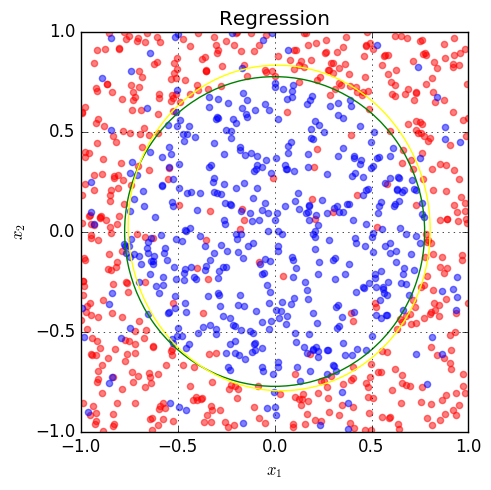

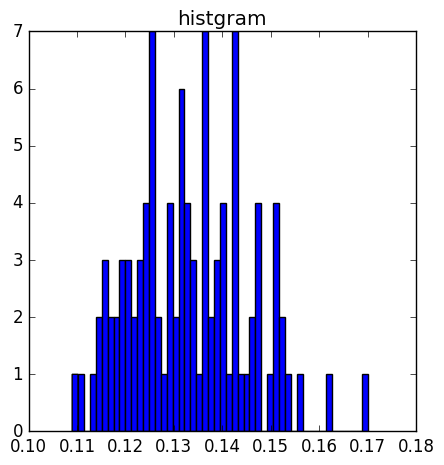

0.13323000000000002

In [43]:
eout_nonlinear_regression(weights_list, plot=true)

### Experiment without noise

In [44]:
probs, weights_list = find_near_weights(1000, noise_rate=0.0)
probs

5-element Array{Float64,1}:
 0.96556
 0.66387
 0.66377
 0.63236
 0.55946

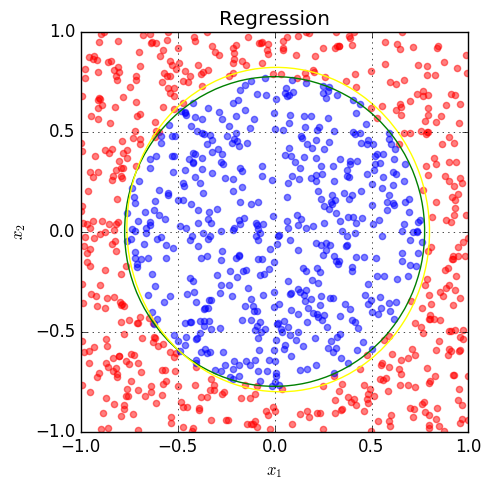

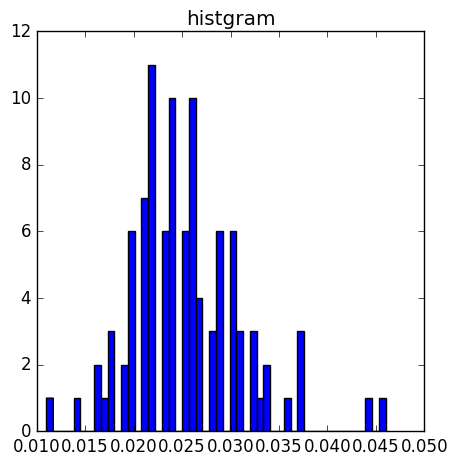

0.025359999999999987

In [45]:
eout_nonlinear_regression(weights_list, plot=true, noise_rate=0.0)

### Experiment with higher noise (20%)

In [46]:
probs, weights_list = find_near_weights(1000, noise_rate=0.2)
probs

5-element Array{Float64,1}:
 0.95273
 0.66422
 0.66038
 0.62998
 0.55989

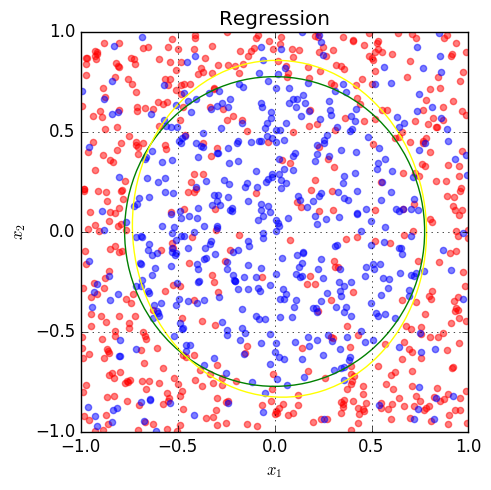

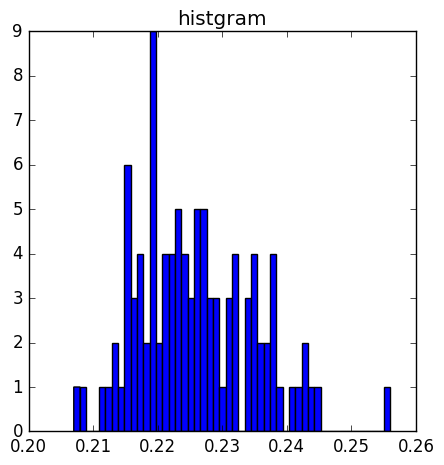

0.22568999999999995

In [47]:
eout_nonlinear_regression(weights_list, plot=true, noise_rate=0.2)

### Experiment with higher noise (30%)

In [48]:
probs, weights_list = find_near_weights(1000, noise_rate=0.3)
probs

5-element Array{Float64,1}:
 0.93877
 0.65632
 0.65672
 0.63394
 0.56461

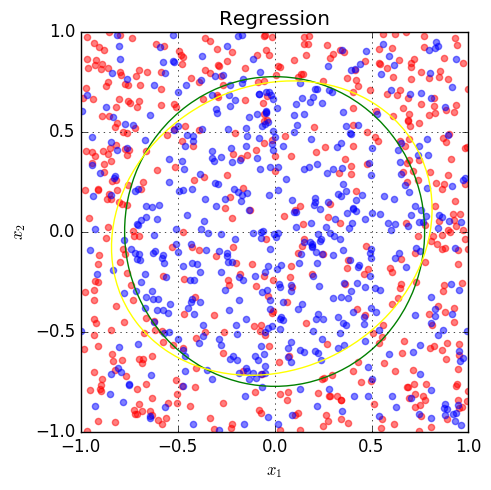

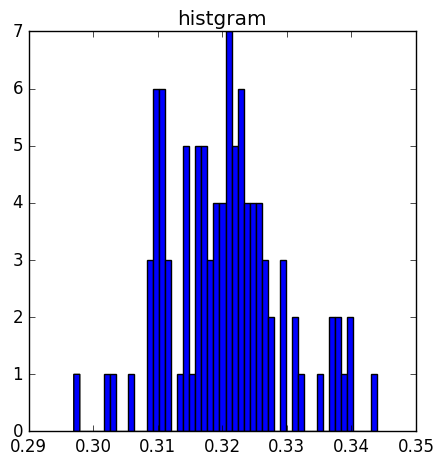

0.3203100000000002

In [49]:
eout_nonlinear_regression(weights_list, plot=true, noise_rate=0.3)

$E_\mathrm{out}$ seems to be proportional to noise rate except the case without noise. This is intuitively prausible.

# Examination of pinv()

In case the number of row is greater than the number of col for a matrix $\mathbf{X}$ and the columns are independent, pinv() (Penrose-Moore pseudoinverse) returns
$(\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal$. So, we can write like

    w = pinv(X)*y

But, even in this case, 

    w = pinv(X'*X)*X'*y
    
computes the result faster.

### Data preparation

In [50]:
num_data = 100
X = rand(num_data, 6)

100x6 Array{Float64,2}:
 0.424403   0.0397956  0.603356   0.919308   0.14036    0.031264  
 0.456447   0.0410131  0.500608   0.535964   0.687081   0.711074  
 0.880227   0.175642   0.108701   0.646363   0.817701   0.492084  
 0.73126    0.883299   0.73764    0.686278   0.0668368  0.171684  
 0.428341   0.0645043  0.251872   0.837513   0.83152    0.791912  
 0.316452   0.129016   0.554859   0.24194    0.610829   0.0235321 
 0.0261592  0.550787   0.856467   0.503814   0.42434    0.439973  
 0.138158   0.361032   0.322478   0.789074   0.0877746  0.212942  
 0.437867   0.481097   0.812717   0.471298   0.914996   0.515827  
 0.603105   0.215522   0.71407    0.0393445  0.680392   0.364889  
 0.497572   0.345311   0.49128    0.530496   0.619146   0.762357  
 0.063878   0.871836   0.391706   0.287459   0.502346   0.0782737 
 0.796654   0.13122    0.663159   0.219544   0.0981492  0.615534  
 ⋮                                                      ⋮         
 0.526401   0.31308    0.766291   0.09

In [51]:
y = rand(num_data, 1)

100x1 Array{Float64,2}:
 0.824658   
 0.0289785  
 0.744599   
 0.528134   
 0.0421639  
 0.222746   
 0.721621   
 0.95544    
 0.307066   
 0.195836   
 0.809168   
 0.968189   
 0.181786   
 ⋮          
 0.764444   
 0.351237   
 0.970071   
 0.000426902
 0.359738   
 0.383281   
 0.263083   
 0.240755   
 0.601106   
 0.113784   
 0.611377   
 0.00747021 

### Comparison

In [52]:
pinv(X' * X) * X' * y

6x1 Array{Float64,2}:
 0.0568443
 0.197654 
 0.159459 
 0.201636 
 0.0849959
 0.233969 

In [53]:
pinv(X) * y

6x1 Array{Float64,2}:
 0.0568443
 0.197654 
 0.159459 
 0.201636 
 0.0849959
 0.233969 

In [54]:
function pinv_test1()
    for i in 1:10000
        X = rand(1000, 6)
        y = rand(1000, 1)
        pinv(X' * X) * X' * y
    end
end

function pinv_test2()
    for i in 1:10000
        X = rand(1000, 6)
        y = rand(1000, 1)
        pinv(X)*y
    end
end

pinv_test2 (generic function with 1 method)

In [55]:
@time pinv_test1()

  2.118289 seconds (543.61 k allocations: 1.534 GB, 10.03% gc time)


In [56]:
@time pinv_test2()

  3.888450 seconds (533.14 k allocations: 2.856 GB, 9.66% gc time)


# Contour plot examples

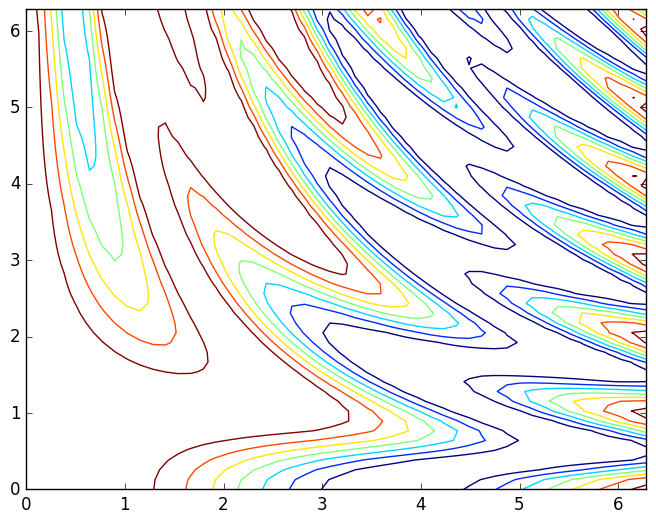

PyObject <matplotlib.contour.QuadContourSet object at 0x7fdac5d3ac10>

In [57]:
using PyPlot
y = linspace(0,2pi,50)
x = y'
contour(x, y, sin(x .+ cos(x .* y)))

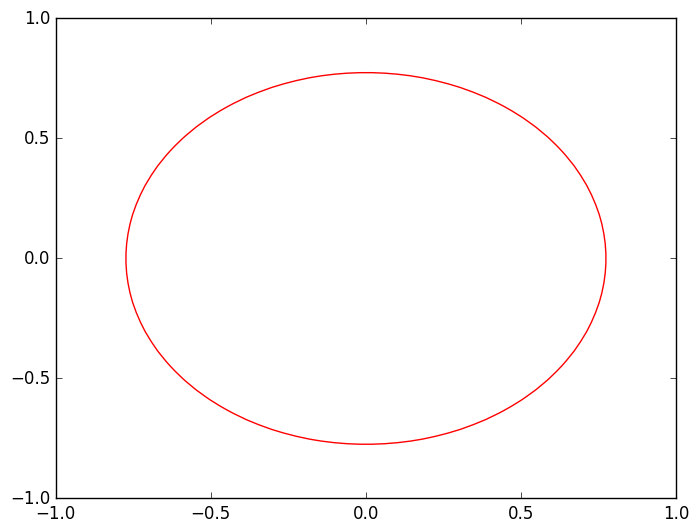

PyObject <matplotlib.contour.QuadContourSet object at 0x7fdac5cc2c50>

In [58]:
y = linspace(-1,1)
x = y'
u = x.^2 .+ y.^2-0.6
contour(x, y, u, 0, colors=("red"))